In [ ]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import norm
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
from sklearn.metrics import average_precision_score

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
torch.manual_seed(1);

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
torch.cuda.is_available()

True

## Read data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
SEQ_LEN = 64
IM_SIZE = 28

seq_name = "5in6"
seq_classes = ["different", "observable", "similar"]
seq_class = "similar"

W_PARAM = 16

In [ ]:
# def read_img_sequences(path_to_folder, size=500):
#     curr_size = 0
#     data = []
#     labels = []
    
#     for sequence_folder in os.listdir(path_to_folder):
#         curr_size += 1
#         full_sequence_folder = os.path.join(path_to_folder, sequence_folder)
#         sequence_img = [None] * SEQ_LEN
#         sequence_labels = [None] * SEQ_LEN
        
#         for img_path in os.listdir(full_sequence_folder):
#             # -3: drop .pt
#             im_index, label = img_path[:-3].split('_')
#             im_index = int(im_index)
#             label = int(label)

#             full_path_to_img = os.path.join(full_sequence_folder, img_path)
#             # load image and reshape to vector
#             img = torch.load(full_path_to_img).view(IM_SIZE * IM_SIZE).detach().cpu().numpy()
#             sequence_img[im_index] = img
#             sequence_labels[im_index] = label
#         data.append(sequence_img)
#         labels.append(sequence_labels)
#         if curr_size ==  size:
#             break
#     return data, labels

In [ ]:
import time
# if torch.cuda.is_available():
#     map_location=lambda storage, loc: storage.cuda()
# else:
#     map_location='cpu'

**старая версия считывания**


In [ ]:
# anomaly_data = []
# anomaly_labels = []

# def read_img_sequences_anomaly(path_to_folder, size=3):
#     curr_size = 0
    
#     folder_path = os.listdir(path_to_folder)

#     for sequence_folder in folder_path:
#         start_time = time.clock()
        
#         curr_size += 1
#         full_sequence_folder = os.path.join(path_to_folder, sequence_folder)
#         sequence_img = [None] * SEQ_LEN
#         sequence_labels = [None] * SEQ_LEN


#         print(curr_size)
        
#         full_path = os.listdir(full_sequence_folder)
        
        
        
#         for img_path in full_path:
#               #time.sleep(0.02)
#             # -3: drop .pt
#             im_index, label = img_path[:-3].split('_')
#             im_index = int(im_index)
#             label = int(label)


#             full_path_to_img = os.path.join(full_sequence_folder, img_path)
#             # load image and reshape to vector

#             #img = torch.load(full_path_to_img, map_location=map_location).view(IM_SIZE * IM_SIZE).detach().cpu().numpy()

#             start_time_real = time.time()
#             sequence_img[im_index] = torch.load(full_path_to_img, map_location=map_location).view(IM_SIZE * IM_SIZE).detach().cpu().numpy()
#             print (time.time() - start_time_real, "Real seconds")

#             sequence_labels[im_index] = label

#         anomaly_data.append(sequence_img)
#         anomaly_labels.append(sequence_labels)

#         print (time.clock() - start_time, "Compute seconds")
        
#         if curr_size ==  size:
#             break

#         del sequence_img, sequence_labels

#     return 0

# read_img_sequences_anomaly('/content/drive/My Drive/CPDnumbers/different/num0in8/img_ts_anomaly/')

In [ ]:
# normal_data = []
# normal_labels = []

# def read_img_sequences_normal(path_to_folder, size=200):
#     curr_size = 0
    
#     folder_path = os.listdir(path_to_folder)

#     for sequence_folder in folder_path:
#         start_time = time.clock()
#         start_time_real = time.time()
#         curr_size += 1
#         full_sequence_folder = os.path.join(path_to_folder, sequence_folder)
#         sequence_img = [None] * SEQ_LEN
#         sequence_labels = [None] * SEQ_LEN


#         print(curr_size)
        
#         full_path = os.listdir(full_sequence_folder)
        
        
        
#         for img_path in full_path:
#               #time.sleep(0.02)
#             # -3: drop .pt
#             im_index, label = img_path[:-3].split('_')
#             im_index = int(im_index)
#             label = int(label)


#             full_path_to_img = os.path.join(full_sequence_folder, img_path)
#             # load image and reshape to vector

#             #img = torch.load(full_path_to_img, map_location=map_location).view(IM_SIZE * IM_SIZE).detach().cpu().numpy()
            
#             sequence_img[im_index] = torch.load(full_path_to_img, map_location=map_location).view(IM_SIZE * IM_SIZE).detach().cpu().numpy()
#             sequence_labels[im_index] = label

#         normal_data.append(sequence_img)
#         normal_labels.append(sequence_labels)

#         print (time.clock() - start_time, "Compute seconds")
#         print (time.time() - start_time_real, "Real seconds")
#         if curr_size ==  size:
#             break

#         del sequence_img, sequence_labels

#     return 0

# read_img_sequences_normal('/content/drive/My Drive/CPDnumbers/different/num0in8/img_ts_normal/')

In [ ]:
# cd "/content/drive/My Drive/CPDnumbers/different/num0in8/img_ts_anomaly/"

In [ ]:
# pwd

In [ ]:
#anomaly_data, anomaly_labels = read_img_sequences('/content/drive/My Drive/CPDnumbers/similar/num3in5/img_ts_anomaly/')


In [ ]:
#normal_data, normal_labels = read_img_sequences('/content/drive/My Drive/CPDnumbers/similar/num3in5/img_ts_normal/')

**New csv method for download**

In [ ]:
import csv
from numpy import genfromtxt

In [ ]:
anomaly_data_csv = []
anomaly_labels_csv = []

def read_img_sequences_anomaly_csv(path_to_folder, size=500):
    curr_size = 0
    
    csv_img_file_path = os.listdir(path_to_folder + "images")
    csv_img_file_path.sort()
    csv_lables_file_path = os.listdir(path_to_folder + "labels")
    csv_lables_file_path.sort()

    print(csv_img_file_path)
    print(csv_lables_file_path)


    for sequence_csv, lables_csv in zip(csv_img_file_path, csv_lables_file_path) :
        start_time = time.clock()      
        curr_size += 1
        print(curr_size)

        sequence_img = [None] * SEQ_LEN
        sequence_labels = [None] * SEQ_LEN

        with open(path_to_folder + "images/" + sequence_csv) as csv_file:
          csv_reader = csv.reader(csv_file, delimiter=',')
          
          row_number = 0;
          for row in csv_reader:
            start_time_real = time.time()

            sequence_img[row_number] = genfromtxt(row, dtype=np.float32)

            row_number += 1

            #print (time.time() - start_time_real, "Real seconds")

        with open(path_to_folder + "labels/" + lables_csv) as csv_file_lables:
          csv_reader_l = csv.reader(csv_file_lables, delimiter=',')

          row_number_l = 0
          for row_l in csv_reader_l:

            sequence_labels[row_number_l] = np.int(genfromtxt(row_l))

            row_number_l += 1


        anomaly_data_csv.append(sequence_img)
        anomaly_labels_csv.append(sequence_labels)

        #print (time.clock() - start_time, "Compute seconds")
        
        if curr_size ==  size:
            break

        del sequence_img, sequence_labels

    return 0

read_img_sequences_anomaly_csv("/content/drive/My Drive/CPDnumbersCSV/" + seq_class + "/num" + seq_name + "/img_ts_anomaly/")


['img_series_0.csv', 'img_series_1.csv', 'img_series_10.csv', 'img_series_100.csv', 'img_series_101.csv', 'img_series_102.csv', 'img_series_103.csv', 'img_series_104.csv', 'img_series_105.csv', 'img_series_106.csv', 'img_series_107.csv', 'img_series_108.csv', 'img_series_109.csv', 'img_series_11.csv', 'img_series_110.csv', 'img_series_111.csv', 'img_series_112.csv', 'img_series_113.csv', 'img_series_114.csv', 'img_series_115.csv', 'img_series_116.csv', 'img_series_117.csv', 'img_series_118.csv', 'img_series_119.csv', 'img_series_12.csv', 'img_series_120.csv', 'img_series_121.csv', 'img_series_122.csv', 'img_series_123.csv', 'img_series_124.csv', 'img_series_125.csv', 'img_series_126.csv', 'img_series_127.csv', 'img_series_128.csv', 'img_series_129.csv', 'img_series_13.csv', 'img_series_130.csv', 'img_series_131.csv', 'img_series_132.csv', 'img_series_133.csv', 'img_series_134.csv', 'img_series_135.csv', 'img_series_136.csv', 'img_series_137.csv', 'img_series_138.csv', 'img_series_139.c

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

0

In [ ]:
normal_data_csv = []
normal_labels_csv = []

def read_img_sequences_normal_csv(path_to_folder, size=500):
    curr_size = 0
    
    csv_img_file_path = os.listdir(path_to_folder + "images")
    csv_img_file_path.sort()
    csv_lables_file_path = os.listdir(path_to_folder + "labels")
    csv_lables_file_path.sort()

    print(csv_img_file_path)
    print(csv_lables_file_path)


    for sequence_csv, lables_csv in zip(csv_img_file_path, csv_lables_file_path) :
        start_time = time.clock()      
        curr_size += 1
        print(curr_size)

        sequence_img = [None] * SEQ_LEN
        sequence_labels = [None] * SEQ_LEN

        with open(path_to_folder + "images/" + sequence_csv) as csv_file:
          csv_reader = csv.reader(csv_file, delimiter=',')
          
          row_number = 0;
          for row in csv_reader:
            start_time_real = time.time()


            sequence_img[row_number] = genfromtxt(row, dtype=np.float32)

            row_number += 1

            #print (time.time() - start_time_real, "Real seconds")

        with open(path_to_folder + "labels/" + lables_csv) as csv_file_lables:
          csv_reader_l = csv.reader(csv_file_lables, delimiter=',')

          row_number_l = 0
          for row_l in csv_reader_l:

            sequence_labels[row_number_l] = np.int(genfromtxt(row_l))

            row_number_l += 1


        normal_data_csv.append(sequence_img)
        normal_labels_csv.append(sequence_labels)

        #print (time.clock() - start_time, "Compute seconds")
        
        if curr_size ==  size:
            break

        del sequence_img, sequence_labels

    return 0

read_img_sequences_normal_csv("/content/drive/My Drive/CPDnumbersCSV/" + seq_class + "/num" + seq_name + "/img_ts_normal/")

['img_series_0.csv', 'img_series_1.csv', 'img_series_10.csv', 'img_series_100.csv', 'img_series_101.csv', 'img_series_102.csv', 'img_series_103.csv', 'img_series_104.csv', 'img_series_105.csv', 'img_series_106.csv', 'img_series_107.csv', 'img_series_108.csv', 'img_series_109.csv', 'img_series_11.csv', 'img_series_110.csv', 'img_series_111.csv', 'img_series_112.csv', 'img_series_113.csv', 'img_series_114.csv', 'img_series_115.csv', 'img_series_116.csv', 'img_series_117.csv', 'img_series_118.csv', 'img_series_119.csv', 'img_series_12.csv', 'img_series_120.csv', 'img_series_121.csv', 'img_series_122.csv', 'img_series_123.csv', 'img_series_124.csv', 'img_series_125.csv', 'img_series_126.csv', 'img_series_127.csv', 'img_series_128.csv', 'img_series_129.csv', 'img_series_13.csv', 'img_series_130.csv', 'img_series_131.csv', 'img_series_132.csv', 'img_series_133.csv', 'img_series_134.csv', 'img_series_135.csv', 'img_series_136.csv', 'img_series_137.csv', 'img_series_138.csv', 'img_series_139.c

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

0

In [ ]:
all_data = np.vstack((anomaly_data_csv, normal_data_csv))
all_labels = np.vstack((anomaly_labels_csv, normal_labels_csv))
#all_labels = (all_labels == 1).astype(int) # old_version
all_labels = (all_labels == int(seq_name[3])).astype(int)


In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(all_data, all_labels, 
                                                                    test_size=0.4, shuffle=True,
                                                                    random_state=42)

test_data, val_data, test_labels, val_labels = train_test_split(test_data, test_labels, 
                                                                test_size=0.5, shuffle=True,
                                                                random_state=42)

## Loss function

In [ ]:
device = torch.device('cuda')

In [ ]:
def loss_delay_detection_2(p_slice):
    n = p_slice.size(0)
    prod = torch.ones(n).to(device)
    p_slice = p_slice.to(device)
    prod[1:] -= p_slice[:-1]
    cumprod = torch.cumprod(prod, dim=0).to(device)
    loss = torch.arange(1, n + 1).to(device) * p_slice * cumprod
    loss = torch.sum(loss)
    return loss


def loss_delay_detection(p_slice, w):
    n = p_slice.size(0) 
    prod = torch.ones(n).to(device)
    p_slice = p_slice.to(device)
    
    prod[1:] -= p_slice[:-1].to(device)
    cumprod = torch.cumprod(prod, dim=0).to(device)
    # TODO drop either n or w
    loss = (torch.arange(1, n + 1).to(device) * p_slice * cumprod 
            + (w + 1) * torch.prod(prod[1:]) * (1 - p_slice[-1]))
    loss = torch.sum(loss)
    return loss

def loss_false_alarms(p_slice):
    length = len(p_slice)
    loss = 0
    
    start_ind = 0
    end_ind = 0
    
    while end_ind < length:
        start_ind = end_ind - 1
        if start_ind < 0:
            start_ind = 0
        end_ind = np.random.randint(start_ind, length + 2)
        if end_ind == start_ind:
            end_ind = end_ind + 1
        loss += 1 - loss_delay_detection_2(p_slice[start_ind: end_ind + 1])    
    #loss += 1 - loss_delay_detection_2(p_slice[start_ind: length])            
    loss = torch.sum(loss)
    return loss

In [ ]:
loss_delay_detection(torch.Tensor([0.9, 0.1, 0.3]), 3)

tensor(1.7570, device='cuda:0')

In [ ]:
class CustomLoss(nn.Module):
    
    def __init__(self):
        super(CustomLoss, self).__init__()
        
    def forward(self, outputs, labels):
        loss = torch.zeros(labels.size(0))
        for i, label in enumerate(labels):
            ind = torch.where(label != label[0])[0]
            if ind.size()[0] == 0:
                loss[i] = loss_false_alarms(outputs[i, :])
            else:
                w = W_PARAM
                alpha = 0.5
                loss[i] = (alpha * loss_delay_detection(outputs[i, ind[0]:(ind[0] + w)], w) + 
                           (1 - alpha) * loss_false_alarms(outputs[i, :ind[0]]))
        loss = torch.mean(loss)
        return loss

In [ ]:
# input data parameters
input_size = IM_SIZE * IM_SIZE
output_size = SEQ_LEN
seq_len = SEQ_LEN

# model hyperparameters
hidden_dim = 100
n_layers = 2
num_workers = 1
learning_rate = 1e-3

batch_size = 64

In [ ]:
def prepare_loader(data, labels, seq_len, input_size, batch_size, shuffle=True, num_workers=1):
    data = torch.FloatTensor(data)
    labels = torch.FloatTensor(labels)
    data = data.view(-1, seq_len, input_size)
    labels = labels.view(-1, seq_len)

    all_data = TensorDataset(data, labels) 
    data_loader = DataLoader(all_data, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)
    
    return data_loader

In [ ]:
device = torch.device("cuda:1")

In [ ]:
train_loader = prepare_loader(train_data, train_labels, seq_len, input_size, batch_size)
val_loader = prepare_loader(val_data, val_labels, seq_len, input_size, batch_size)
test_loader = prepare_loader(test_data, test_labels, seq_len, input_size, batch_size)

In [ ]:
def train_model(model, loss_function, epochs=100, print_every=5, LSTM_flag = True):
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    
    
    valid_loss_min = np.Inf

    loss_list = []
    acc_list = []
    overall_val_loss_list = []
    counter = 0
    model.train()

    out_list = []
    labels_list = []

    model.train()
    for i in range(epochs):
        # for inputs, labels in tqdm(train_loader):
        for inputs, labels in train_loader:
            if inputs.shape[0] < batch_size:
                break

            counter += 1
            inputs, labels = inputs.to(device), labels.to(device)  

            if LSTM_flag:
                h = model.init_hidden(batch_size)
                #print(h.shape)
                #h = tuple([e.data for e in h])
                
                output, h = model(inputs, h)
            else:
                output = model(inputs)

            loss = loss_function(output.squeeze(), labels.float())
            loss_list += [loss.cpu().clone().detach()]
            accuracy = ((output > 0.5).long()) == labels
            acc_list += [accuracy.cpu().detach().float().mean()] # += []
            out_list.append(output.cpu().detach().float())
            labels_list.append(labels.cpu().detach().float())

            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            if counter%print_every == 0:
                val_losses = []
                val_outputs = []
                model.eval()
                for val_inputs, val_labels in val_loader:
                    if val_inputs.shape[0] < batch_size:
                        break
                    val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)

                    if LSTM_flag:
                        val_h = model.init_hidden(batch_size)
                        #val_h = tuple([each.data for each in val_h])
                        val_out, val_h = model(val_inputs, val_h)
                    else:
                        val_out = model(val_inputs)
                        
                    val_loss = loss_function(val_out.squeeze(), val_labels.float())
                    val_losses.append(val_loss.item())
                    val_outputs += [val_out.cpu().clone().detach()]

                val_outputs_one = torch.cat(val_outputs, 0)

                overall_val_loss_list.append(np.mean(val_losses))

                model.train()
                print("Epoch: {}/{}...".format(i+1, epochs),
                      "Step: {}...".format(counter),
                      "Loss: {:.6f}...".format(loss.item()),
                      "Val Loss: {:.6f}".format(np.mean(val_losses)))
    return model, (loss_list, acc_list, overall_val_loss_list)

## LSTM Model

In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers, drop_prob=0.5):
        
        super(LSTM, self).__init__()
        self.input_size = input_size
        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim        
        # if batch_first, than shape of lstm_in: [batch_size, seq_len, input_size]
        self.lstm = nn.LSTM(input_size, hidden_dim, n_layers, dropout=drop_prob, batch_first=True)
        self.dropout = nn.Dropout(drop_prob)
        self.linear_1 = nn.Linear(hidden_dim, hidden_dim//2)
        self.linear_2 = nn.Linear(hidden_dim//2, 1)
        self.activation = nn.Sigmoid()
        self.relu = nn.ReLU()
        
    def forward(self, input_seq, hidden):
        batch_size = input_seq.size(0)
        lstm_out, hidden = self.lstm(input_seq, hidden)  
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)      
        out = self.linear_1(lstm_out)
        out = self.dropout(out)
        out = self.relu(out)
        out = self.linear_2(out)
        out = self.activation(out)
        out = out.view(batch_size, -1)

        return out, hidden

    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        
        hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device))
        return hidden

In [ ]:
class GRU(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers, drop_prob=0.5):
        
        super(GRU, self).__init__()
        self.input_size = input_size
        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim        
        # if batch_first, than shape of lstm_in: [batch_size, seq_len, input_size]
        self.gru = nn.GRU(input_size, hidden_dim, n_layers, dropout=drop_prob, batch_first=True)
        self.dropout = nn.Dropout(drop_prob)
        self.linear_1 = nn.Linear(hidden_dim, hidden_dim//2)
        self.linear_2 = nn.Linear(hidden_dim//2, 1)
        self.activation = nn.Sigmoid()
        self.relu = nn.ReLU()
        
    def forward(self, input_seq, hidden):
        batch_size = input_seq.size(0)
        #print(hidden[0].shape)
        gru_out, hidden = self.gru(input_seq, hidden)
        #print(gru_out, hidden)  
        gru_out = gru_out.contiguous().view(-1, self.hidden_dim)      
        out = self.linear_1(gru_out)
        out = self.dropout(out)
        out = self.relu(out)
        out = self.linear_2(out)
        out = self.activation(out)
        out = out.view(batch_size, -1)

        return out, hidden

    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        
        # hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
        #           weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device))
        
        hidden = weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device)

        return hidden

In [ ]:
device = torch.device("cuda") # changes
model_LSTM_custom = LSTM(input_size=input_size, output_size=output_size, hidden_dim=hidden_dim, n_layers=n_layers)
#model_LSTM_custom = GRU(input_size=input_size, output_size=output_size, hidden_dim=hidden_dim, n_layers=n_layers)
loss_function = CustomLoss()
model_LSTM_custom.to(device)

LSTM(
  (lstm): LSTM(784, 100, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.5, inplace=False)
  (linear_1): Linear(in_features=100, out_features=50, bias=True)
  (linear_2): Linear(in_features=50, out_features=1, bias=True)
  (activation): Sigmoid()
  (relu): ReLU()
)

In [ ]:
model_LSTM_custom, (loss_list, acc_list, 
                    overall_val_loss_list) = train_model(model_LSTM_custom, loss_function, 60, 5, LSTM_flag=True) # was True

Epoch: 1/60... Step: 5... Loss: -2.073558... Val Loss: -2.045366
Epoch: 2/60... Step: 10... Loss: -1.438372... Val Loss: -2.550454
Epoch: 2/60... Step: 15... Loss: -2.966324... Val Loss: -3.153249
Epoch: 3/60... Step: 20... Loss: -3.633088... Val Loss: -4.547816
Epoch: 3/60... Step: 25... Loss: -7.559563... Val Loss: -5.840996
Epoch: 4/60... Step: 30... Loss: -7.032174... Val Loss: -6.976205
Epoch: 4/60... Step: 35... Loss: -7.785749... Val Loss: -8.080485
Epoch: 5/60... Step: 40... Loss: -8.868420... Val Loss: -9.027714
Epoch: 5/60... Step: 45... Loss: -11.173761... Val Loss: -7.851297
Epoch: 6/60... Step: 50... Loss: -10.312019... Val Loss: -9.962338
Epoch: 7/60... Step: 55... Loss: -10.908873... Val Loss: -11.623293
Epoch: 7/60... Step: 60... Loss: -9.965322... Val Loss: -10.917897
Epoch: 8/60... Step: 65... Loss: -11.928150... Val Loss: -10.428205
Epoch: 8/60... Step: 70... Loss: -12.868511... Val Loss: -9.208585
Epoch: 9/60... Step: 75... Loss: -9.860775... Val Loss: -10.662605
Ep

In [ ]:
model_LSTM_bce = LSTM(input_size=input_size, output_size=output_size, hidden_dim=hidden_dim, n_layers=n_layers)
#model_LSTM_bce = GRU(input_size=input_size, output_size=output_size, hidden_dim=hidden_dim, n_layers=n_layers)
bce_loss_function = torch.nn.BCELoss()
model_LSTM_bce.to(device)

LSTM(
  (lstm): LSTM(784, 100, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.5, inplace=False)
  (linear_1): Linear(in_features=100, out_features=50, bias=True)
  (linear_2): Linear(in_features=50, out_features=1, bias=True)
  (activation): Sigmoid()
  (relu): ReLU()
)

In [ ]:
model_LSTM_bce, (bce_loss_list, bce_acc_list, bce_overall_val_loss_list) = train_model(model_LSTM_bce, bce_loss_function, 
                                                                                       60, 5, LSTM_flag=True)

Epoch: 1/60... Step: 5... Loss: 0.612172... Val Loss: 0.579517
Epoch: 2/60... Step: 10... Loss: 0.447224... Val Loss: 0.397082
Epoch: 2/60... Step: 15... Loss: 0.334848... Val Loss: 0.292605
Epoch: 3/60... Step: 20... Loss: 0.212554... Val Loss: 0.218764
Epoch: 3/60... Step: 25... Loss: 0.188922... Val Loss: 0.144260
Epoch: 4/60... Step: 30... Loss: 0.098440... Val Loss: 0.098457
Epoch: 4/60... Step: 35... Loss: 0.068474... Val Loss: 0.070260
Epoch: 5/60... Step: 40... Loss: 0.054711... Val Loss: 0.066401
Epoch: 5/60... Step: 45... Loss: 0.091744... Val Loss: 0.063797
Epoch: 6/60... Step: 50... Loss: 0.091778... Val Loss: 0.077867
Epoch: 7/60... Step: 55... Loss: 0.057114... Val Loss: 0.068732
Epoch: 7/60... Step: 60... Loss: 0.043732... Val Loss: 0.061569
Epoch: 8/60... Step: 65... Loss: 0.042297... Val Loss: 0.048591
Epoch: 8/60... Step: 70... Loss: 0.057147... Val Loss: 0.051621
Epoch: 9/60... Step: 75... Loss: 0.031747... Val Loss: 0.044556
Epoch: 9/60... Step: 80... Loss: 0.031446

In [ ]:
model_LSTM_combined = LSTM(input_size=input_size, output_size=output_size, hidden_dim=hidden_dim, n_layers=n_layers)
#model_LSTM_combined = GRU(input_size=input_size, output_size=output_size, hidden_dim=hidden_dim, n_layers=n_layers)
first_bce_loss_function = torch.nn.BCELoss()
second_custom_loss_function = CustomLoss()
model_LSTM_combined.to(device)

LSTM(
  (lstm): LSTM(784, 100, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.5, inplace=False)
  (linear_1): Linear(in_features=100, out_features=50, bias=True)
  (linear_2): Linear(in_features=50, out_features=1, bias=True)
  (activation): Sigmoid()
  (relu): ReLU()
)

In [ ]:
model_LSTM_combined, _ = train_model(model_LSTM_combined, first_bce_loss_function, 30, 5, 
                                    LSTM_flag=True)

Epoch: 1/30... Step: 5... Loss: 0.644666... Val Loss: 0.588138
Epoch: 2/30... Step: 10... Loss: 0.399054... Val Loss: 0.410709
Epoch: 2/30... Step: 15... Loss: 0.327616... Val Loss: 0.322693
Epoch: 3/30... Step: 20... Loss: 0.284015... Val Loss: 0.255761
Epoch: 3/30... Step: 25... Loss: 0.178105... Val Loss: 0.189840
Epoch: 4/30... Step: 30... Loss: 0.147095... Val Loss: 0.133378
Epoch: 4/30... Step: 35... Loss: 0.129280... Val Loss: 0.090376
Epoch: 5/30... Step: 40... Loss: 0.070719... Val Loss: 0.071381
Epoch: 5/30... Step: 45... Loss: 0.057137... Val Loss: 0.061920
Epoch: 6/30... Step: 50... Loss: 0.055655... Val Loss: 0.062772
Epoch: 7/30... Step: 55... Loss: 0.061118... Val Loss: 0.055785
Epoch: 7/30... Step: 60... Loss: 0.046183... Val Loss: 0.068904
Epoch: 8/30... Step: 65... Loss: 0.031982... Val Loss: 0.052495
Epoch: 8/30... Step: 70... Loss: 0.045698... Val Loss: 0.047289
Epoch: 9/30... Step: 75... Loss: 0.035000... Val Loss: 0.048779
Epoch: 9/30... Step: 80... Loss: 0.037383

In [ ]:
model_LSTM_combined, __ = train_model(model_LSTM_combined, second_custom_loss_function, 30, 5, 
                                      LSTM_flag=True)

Epoch: 1/30... Step: 5... Loss: -4.222267... Val Loss: -4.448358
Epoch: 2/30... Step: 10... Loss: -7.291567... Val Loss: -7.594781
Epoch: 2/30... Step: 15... Loss: -7.992828... Val Loss: -8.392918
Epoch: 3/30... Step: 20... Loss: -9.874153... Val Loss: -7.764109
Epoch: 3/30... Step: 25... Loss: -10.758307... Val Loss: -9.332395
Epoch: 4/30... Step: 30... Loss: -11.129347... Val Loss: -7.762897
Epoch: 4/30... Step: 35... Loss: -10.501730... Val Loss: -10.457665
Epoch: 5/30... Step: 40... Loss: -9.929295... Val Loss: -10.061934
Epoch: 5/30... Step: 45... Loss: -10.362081... Val Loss: -11.231924
Epoch: 6/30... Step: 50... Loss: -8.531548... Val Loss: -11.751537
Epoch: 7/30... Step: 55... Loss: -10.974071... Val Loss: -10.649759
Epoch: 7/30... Step: 60... Loss: -11.831126... Val Loss: -10.166826
Epoch: 8/30... Step: 65... Loss: -7.264599... Val Loss: -10.506695
Epoch: 8/30... Step: 70... Loss: -14.333408... Val Loss: -10.983690
Epoch: 9/30... Step: 75... Loss: -10.553041... Val Loss: -11.6

## FNN Models

In [ ]:
class FNN(nn.Module):
    def __init__(self, input_size, hidden_dim, output_size, drop_prob=0.5):
        super(FNN, self).__init__()
        # Linear function as in LSTM model

        self.linear_1 = nn.Linear(input_size, hidden_dim) 
        self.linear_2 = nn.Linear(hidden_dim, hidden_dim//2) 
        self.linear_3 = nn.Linear(hidden_dim//2, 1)  
        self.dropout = nn.Dropout(drop_prob)
        self.relu = nn.ReLU()
        self.activation = nn.Sigmoid()


    def forward(self, input_seq):
        batch_size = input_seq.size(0)
        out = self.linear_1(input_seq)
        out = self.dropout(out)
        out = self.relu(out)
        out = self.linear_2(out)
        out = self.dropout(out)
        out = self.relu(out)
        out = self.linear_3(out)
        out = self.activation(out)
        out = out.view(batch_size, -1)
        return out

In [ ]:
model_FNN_custom = FNN(input_size=input_size, hidden_dim=hidden_dim, output_size=output_size)
loss_function = CustomLoss()
model_FNN_custom.to(device)

FNN(
  (linear_1): Linear(in_features=784, out_features=100, bias=True)
  (linear_2): Linear(in_features=100, out_features=50, bias=True)
  (linear_3): Linear(in_features=50, out_features=1, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (relu): ReLU()
  (activation): Sigmoid()
)

In [ ]:
model_FNN_custom, (loss_list, acc_list, overall_val_loss_list) = train_model(model_FNN_custom, loss_function, 
                                                                             20, 5, LSTM_flag=False)

Epoch: 1/20... Step: 5... Loss: -2.699138... Val Loss: -2.502553
Epoch: 2/20... Step: 10... Loss: -3.244850... Val Loss: -3.681437
Epoch: 2/20... Step: 15... Loss: -4.721488... Val Loss: -4.858209
Epoch: 3/20... Step: 20... Loss: -5.569246... Val Loss: -5.882034
Epoch: 3/20... Step: 25... Loss: -6.938100... Val Loss: -5.449242
Epoch: 4/20... Step: 30... Loss: -6.864754... Val Loss: -5.855878
Epoch: 4/20... Step: 35... Loss: -7.058817... Val Loss: -6.328539
Epoch: 5/20... Step: 40... Loss: -5.399346... Val Loss: -6.156223
Epoch: 5/20... Step: 45... Loss: -6.619709... Val Loss: -5.869389
Epoch: 6/20... Step: 50... Loss: -6.052639... Val Loss: -5.890896
Epoch: 7/20... Step: 55... Loss: -7.342331... Val Loss: -5.386422
Epoch: 7/20... Step: 60... Loss: -6.446607... Val Loss: -5.943195
Epoch: 8/20... Step: 65... Loss: -5.637675... Val Loss: -6.472022
Epoch: 8/20... Step: 70... Loss: -7.417307... Val Loss: -5.401038
Epoch: 9/20... Step: 75... Loss: -7.255973... Val Loss: -4.879313
Epoch: 9/20

In [ ]:
model_FNN_bce = FNN(input_size=input_size, hidden_dim=hidden_dim, output_size=output_size)
bce_loss_function = torch.nn.BCELoss()
model_FNN_bce.to(device)

FNN(
  (linear_1): Linear(in_features=784, out_features=100, bias=True)
  (linear_2): Linear(in_features=100, out_features=50, bias=True)
  (linear_3): Linear(in_features=50, out_features=1, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (relu): ReLU()
  (activation): Sigmoid()
)

In [ ]:
model_FNN_bce, (bce_loss_list, bce_acc_list, bce_overall_val_loss_list) = train_model(model_FNN_bce, bce_loss_function, 20, 5, LSTM_flag=False)

Epoch: 1/20... Step: 5... Loss: 0.612148... Val Loss: 0.572488
Epoch: 2/20... Step: 10... Loss: 0.458674... Val Loss: 0.388009
Epoch: 2/20... Step: 15... Loss: 0.299847... Val Loss: 0.243647
Epoch: 3/20... Step: 20... Loss: 0.203876... Val Loss: 0.148694
Epoch: 3/20... Step: 25... Loss: 0.161547... Val Loss: 0.107369
Epoch: 4/20... Step: 30... Loss: 0.150664... Val Loss: 0.089762
Epoch: 4/20... Step: 35... Loss: 0.060876... Val Loss: 0.083796
Epoch: 5/20... Step: 40... Loss: 0.085818... Val Loss: 0.080973
Epoch: 5/20... Step: 45... Loss: 0.104367... Val Loss: 0.075798
Epoch: 6/20... Step: 50... Loss: 0.121768... Val Loss: 0.072278
Epoch: 7/20... Step: 55... Loss: 0.078760... Val Loss: 0.068221
Epoch: 7/20... Step: 60... Loss: 0.060533... Val Loss: 0.068100
Epoch: 8/20... Step: 65... Loss: 0.057854... Val Loss: 0.068216
Epoch: 8/20... Step: 70... Loss: 0.091056... Val Loss: 0.066415
Epoch: 9/20... Step: 75... Loss: 0.061554... Val Loss: 0.064549
Epoch: 9/20... Step: 80... Loss: 0.081729

In [ ]:
model_FNN_combined = FNN(input_size=input_size, hidden_dim=hidden_dim, output_size=output_size)
first_bce_loss_function = torch.nn.BCELoss()
second_custom_loss_function = CustomLoss()
model_FNN_combined.to(device)

FNN(
  (linear_1): Linear(in_features=784, out_features=100, bias=True)
  (linear_2): Linear(in_features=100, out_features=50, bias=True)
  (linear_3): Linear(in_features=50, out_features=1, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (relu): ReLU()
  (activation): Sigmoid()
)

In [ ]:
model_FNN_combined, _ = train_model(model_FNN_combined, first_bce_loss_function, 5, 5, LSTM_flag=False)

Epoch: 1/5... Step: 5... Loss: 0.594595... Val Loss: 0.551552
Epoch: 2/5... Step: 10... Loss: 0.416265... Val Loss: 0.354217
Epoch: 2/5... Step: 15... Loss: 0.274408... Val Loss: 0.207446
Epoch: 3/5... Step: 20... Loss: 0.177212... Val Loss: 0.126937
Epoch: 3/5... Step: 25... Loss: 0.112985... Val Loss: 0.100887
Epoch: 4/5... Step: 30... Loss: 0.100966... Val Loss: 0.088061
Epoch: 4/5... Step: 35... Loss: 0.059444... Val Loss: 0.080296
Epoch: 5/5... Step: 40... Loss: 0.050612... Val Loss: 0.071778
Epoch: 5/5... Step: 45... Loss: 0.068491... Val Loss: 0.073506


In [ ]:
model_FNN_combined, __ = train_model(model_FNN_combined, second_custom_loss_function, 5, 5, LSTM_flag=False)

Epoch: 1/5... Step: 5... Loss: -4.759800... Val Loss: -4.253312
Epoch: 2/5... Step: 10... Loss: -4.357574... Val Loss: -4.919676
Epoch: 2/5... Step: 15... Loss: -4.774022... Val Loss: -5.319858
Epoch: 3/5... Step: 20... Loss: -7.321510... Val Loss: -4.676497
Epoch: 3/5... Step: 25... Loss: -6.770959... Val Loss: -5.871940
Epoch: 4/5... Step: 30... Loss: -5.867428... Val Loss: -6.435902
Epoch: 4/5... Step: 35... Loss: -6.176308... Val Loss: -6.210068
Epoch: 5/5... Step: 40... Loss: -6.499931... Val Loss: -5.314098
Epoch: 5/5... Step: 45... Loss: -6.734245... Val Loss: -5.805493


## Save all models


In [ ]:
models_names = {"model_FNN_bce" : model_FNN_bce, "model_FNN_custom" : model_FNN_custom,
                "model_FNN_combined" : model_FNN_combined, "model_LSTM_bce" : model_LSTM_bce,
                "model_LSTM_custom" : model_LSTM_custom, "model_LSTM_combined" : model_LSTM_combined}

for m_name in models_names.keys():
  torch.save(models_names.get(m_name).state_dict(), str(m_name) + seq_name + ".pth")

## Calculate metrics for different models

In [ ]:
def evaluate_metrics(y_true, y_pred, threshold=0.5, is_for_results = False):
    """
    Evaluate metrics for change point detection
    We assume, that there is no more than one change index in data (so, either 0 or 1 change)
    Inputs
    y_true : torch.Tensor
      true labels
    y_pred : torch.Tensor
      change probabiltiy
    threshold : float
      detection threshold
      
    Returns
    false_positive : int
      number of false positives
    false_negative : int
      number of false negatives
    delay : int
      detection delay
    accuracy : float
      y_pred accuracy given y_truei
    """
    delay = 0
    false_positive = 0
    false_negative = 0
    true_negative = 0
    true_positive = 0

    index_real = torch.where(y_true != y_true[0])[0] # indexes with real changes
    index_detected = torch.where((y_pred > threshold).long() != y_true[0])[0] # indexes with predicted changes

    if len(index_real) > 0:
        real_change_index = index_real[0]

        if len(index_detected) > 0:
            index_sub_detected = torch.where(index_detected >= real_change_index)[0]

            if len(index_sub_detected) == len(index_detected):
                false_positive_delay = real_change_index.item()
                detected_change_index = index_detected[0]
                delay = (detected_change_index - real_change_index).item()
                true_positive +=1
            else:
                false_positive_delay = index_detected[0].item()
                delay = 0
                false_positive += 1
                
        else:
            false_positive_delay = seq_len
            delay = (seq_len - real_change_index).item()
            false_negative += 1

    else:
        if len(index_detected) > 0:
            false_positive_delay = index_detected[0].item()
            false_positive += 1
        else:
            false_positive_delay = seq_len
            true_negative += 1
    
    accuracy = ((y_pred > threshold).long() == y_true).float().mean().item()

    
    if is_for_results == False:
      return false_positive, false_negative, delay, false_positive_delay, accuracy
    else:
      # precision = true_positive / (true_positive + false_positive)
      # recall = true_positive/ (true_positive + false_negative)
      # f1_score = 2 * (recall * precision) / (recall + precision)
      # spec = true_negative / ( false_positive + true_negative )
      # g_mean = np.sqrt(recall + spec)

      return true_positive, true_negative, false_positive, false_negative
      # accuracy, precision, recall, f1_score, g_mean

def evaluate_metrics_new(y_true, y_pred, threshold=0.5, is_for_results = False):
    """
    Evaluate metrics for change point detection
    We assume, that there is no more than one change index in data (so, either 0 or 1 change)
    Inputs
    y_true : torch.Tensor
      true labels
    y_pred : torch.Tensor
      change probabiltiy
    threshold : float
      detection threshold
      
    Returns
    false_positive : int
      number of false positives
    false_negative : int
      number of false negatives
    delay : int
      detection delay
    accuracy : float
      y_pred accuracy given y_truei
    """
    delay = 0
    false_positive = 0
    false_negative = 0
    true_negative = 0
    true_positive = 0

    index_real = torch.where(y_true != y_true[0])[0] # indexes with real changes
    index_detected = torch.where((y_pred > threshold).long() != y_true[0])[0] # indexes with predicted changes

    if len(index_real) > 0:
        real_change_index = index_real[0]

        if len(index_detected) > 0:
            index_sub_detected = torch.where(index_detected >= real_change_index)[0]

            if len(index_sub_detected) == len(index_detected):
                false_positive_delay = seq_len
                detected_change_index = index_detected[0]
                delay = (detected_change_index - real_change_index).item()
                true_positive +=1
            else:
                false_positive_delay = index_detected[0].item()
                delay = 0
                false_positive += 1
                
        else:
            false_positive_delay = seq_len
            delay = (seq_len - real_change_index).item()
            false_negative += 1

    else:
        if len(index_detected) > 0:
            false_positive_delay = index_detected[0].item()
            false_positive += 1
        else:
            false_positive_delay = seq_len
            true_negative += 1
    
    accuracy = ((y_pred > threshold).long() == y_true).float().mean().item()

    
    if is_for_results == False:
      return false_positive, false_negative, delay, false_positive_delay, accuracy
    else:
      # precision = true_positive / (true_positive + false_positive)
      # recall = true_positive/ (true_positive + false_negative)
      # f1_score = 2 * (recall * precision) / (recall + precision)
      # spec = true_negative / ( false_positive + true_negative )
      # g_mean = np.sqrt(recall + spec)

      return true_positive, true_negative, false_positive, false_negative
      # accuracy, precision, recall, f1_score, g_mean

In [ ]:
def get_quality_metrics(test_loader, model, threshold=0.5, LSTM_flag=True):
    test_loss_list = []
    test_acc_list = []

    positive_number = 0 
    negative_number = 0
    fp_list = []
    fn_list = []
    delay_list = []
    fp_delay_list = []
    accuracy_list = []

    model.eval()
    for test_inputs, test_true_labels in test_loader:
        if test_inputs.shape[0] < test_batch_size:
            break
            
        test_inputs, test_true_labels = test_inputs.to(device), test_true_labels.to(device)

        if LSTM_flag:
            test_hidden = model.init_hidden(batch_size)
            #test_hidden = tuple([each.data for each in test_hidden])
            test_predictions, test_hidden = model(test_inputs, test_hidden)
        else:
            test_predictions = model(test_inputs)
            
        test_loss = loss_function(test_predictions.squeeze(), test_true_labels.float())
        test_loss_list += [test_loss.cpu().clone().detach()]

        for i in range(0, test_batch_size):
            curr_labels = test_true_labels[i]
            curr_predictions = test_predictions[i]
            
            # torch.rand_like
            curr_fp, curr_fn, curr_delay, curr_fp_delay, curr_accuracy = evaluate_metrics(curr_labels, curr_predictions, 
                                                                           threshold)

            max_difference = np.abs((curr_labels.max() - curr_labels.min()).item())
            if max_difference: 
                delay_list.append(curr_delay)
            positive_number += (max_difference > 0)
            negative_number += 1 - (max_difference > 0)

            fp_list.append(curr_fp)
            fn_list.append(curr_fn)
            fp_delay_list.append(curr_fp_delay)
            accuracy_list.append(curr_accuracy)

        test_acc_list.append(np.mean(accuracy_list[-test_batch_size:]))
        
    return (positive_number, negative_number, np.mean(test_loss_list), np.mean(test_acc_list), np.mean(delay_list),
            np.mean(fp_delay_list), np.sum(fp_list), np.sum(fn_list))

In [ ]:
def get_pareto_metrics_for_threshold(model, test_loader, threshold_list, LSTM_flag=True):
    fp_number_list = []
    fn_number_list = []
    delay_list = []
    fp_delay_list = []
    for threshold in threshold_list:
        # test_loader = prepare_loader(test_data, test_labels, seq_len, input_size, batch_size)

        (positive_number, negative_number, test_loss, 
         test_acc, mean_delay, mean_fp_delay, fp_number, fn_number) = get_quality_metrics(test_loader, model, threshold, LSTM_flag)

        fp_number_list.append(fp_number)
        fn_number_list.append(fn_number)
        delay_list.append(mean_delay)
        fp_delay_list.append(mean_fp_delay)
        #print(threshold, fp_number, fn_number, mean_delay, mean_fp_delay)
    
    return fp_number_list, fn_number_list, delay_list, fp_delay_list

In [ ]:
def get_quality_metrics_for_results(model, test_loader, threshold, LSTM_flag=True):
    test_loss_list = []
    test_acc_list = []
    
    def weird_division(n, d):
      return n / d if d else 0

    positive_number = 0 
    negative_number = 0
    fp_list = []
    fn_list = []
    delay_list = []
    fp_delay_list = []
    accuracy_list = []

    true_positive = 0
    true_negative = 0
    false_positive = 0
    false_negative = 0

    model.eval()
    for test_inputs, test_true_labels in test_loader:
        if test_inputs.shape[0] < test_batch_size:
            break
            
        test_inputs, test_true_labels = test_inputs.to(device), test_true_labels.to(device)

        if LSTM_flag:
            test_hidden = model.init_hidden(batch_size)
            test_hidden = tuple([each.data for each in test_hidden])
            test_predictions, test_hidden = model(test_inputs, test_hidden)
        else:
            test_predictions = model(test_inputs)
            
        test_loss = loss_function(test_predictions.squeeze(), test_true_labels.float())
        test_loss_list += [test_loss.cpu().clone().detach()]
        
        for i in range(0, test_batch_size):
            curr_labels = test_true_labels[i]
            curr_predictions = test_predictions[i]
            true_positive_cur, true_negative_cur, false_positive_cur, false_negative_cur = evaluate_metrics(
                curr_labels, curr_predictions, threshold, is_for_results = True)
        
            true_positive += true_positive_cur
            true_negative += true_negative_cur
            false_positive += false_positive_cur
            false_negative += false_negative_cur


    accuracy = true_positive + true_negative / (true_positive + true_negative + false_positive + false_negative)
    precision = weird_division(true_positive , (true_positive + false_positive))
    print("Metrics", true_positive, true_negative, false_positive, false_negative, threshold)
    recall = weird_division(true_positive, (true_positive + false_negative))
    f1_score = 2 * weird_division((recall * precision), (recall + precision))
    spec = weird_division(true_negative, ( false_positive + true_negative ))
    g_mean = np.sqrt(recall + spec)

    return true_positive, true_negative, false_positive, false_negative, accuracy, precision, recall, f1_score, g_mean


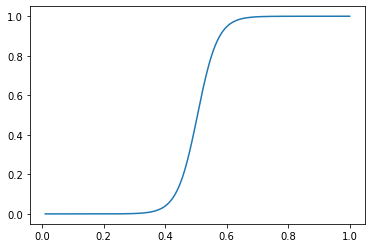

In [ ]:
threshold_number = 200
threshold_list = np.linspace(-15, 15, threshold_number)
threshold_list = 1 / (1 + np.exp(-threshold_list))
plt.plot(np.linspace(0.01, 1, threshold_number), threshold_list)

In [ ]:
test_batch_size = 64
final_test_loader = prepare_loader(test_data, test_labels, seq_len, input_size, test_batch_size, shuffle=False)

(fp_number_list_FNN_bce, fn_number_list_FNN_bce, 
 delay_list_FNN_bce, fp_delay_list_FNN_bce) = get_pareto_metrics_for_threshold(model_FNN_bce, final_test_loader, 
                                                                               threshold_list, LSTM_flag=False)

In [ ]:
test_batch_size = 64
final_test_loader = prepare_loader(test_data, test_labels, seq_len, input_size, test_batch_size, shuffle=False)

(fp_number_list_FNN_custom, fn_number_list_FNN_custom, 
 delay_list_FNN_custom, fp_delay_list_FNN_custom) = get_pareto_metrics_for_threshold(model_FNN_custom, final_test_loader, 
                                                                                     threshold_list, LSTM_flag=False)

In [ ]:
test_batch_size = 64
final_test_loader = prepare_loader(test_data, test_labels, seq_len, input_size, test_batch_size, shuffle=False)

(fp_number_list_FNN_combined, fn_number_list_FNN_combined, 
 delay_list_FNN_combined, fp_delay_list_FNN_combined) = get_pareto_metrics_for_threshold(model_FNN_combined, final_test_loader, 
                                                                                         threshold_list, LSTM_flag=False)

In [ ]:
test_batch_size = 64
final_test_loader = prepare_loader(test_data, test_labels, seq_len, input_size, test_batch_size, shuffle=False)

(fp_number_list_LSTM_bce, fn_number_list_LSTM_bce, 
 delay_list_LSTM_bce, fp_delay_list_LSTM_bce) = get_pareto_metrics_for_threshold(model_LSTM_bce, final_test_loader, 
                                                                                 threshold_list, LSTM_flag=True)

In [ ]:
test_batch_size = 64
final_test_loader = prepare_loader(test_data, test_labels, seq_len, input_size, test_batch_size, shuffle=False)

(fp_number_list_LSTM_custom, fn_number_list_LSTM_custom, 
 delay_list_LSTM_custom, fp_delay_list_LSTM_custom) = get_pareto_metrics_for_threshold(model_LSTM_custom, final_test_loader, 
                                                                                       threshold_list, LSTM_flag=True)

In [ ]:
test_batch_size = 64
final_test_loader = prepare_loader(test_data, test_labels, seq_len, input_size, test_batch_size, shuffle=False)
print(len(final_test_loader))
(fp_number_list_LSTM_combined, fn_number_list_LSTM_combined, delay_list_LSTM_combined, fp_delay_list_LSTM_combined) = get_pareto_metrics_for_threshold(model_LSTM_combined, final_test_loader, threshold_list, LSTM_flag=True)

4


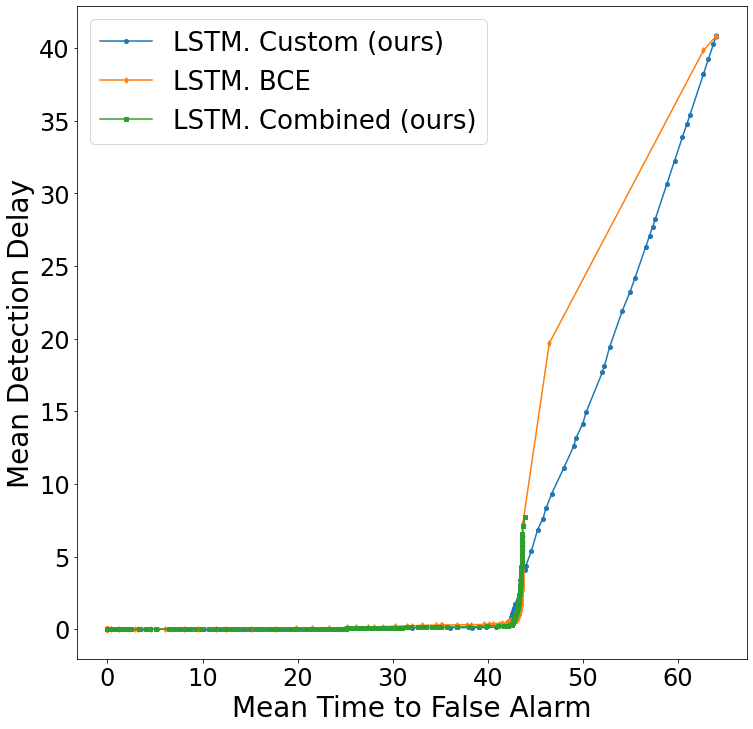

In [ ]:
plt.figure(figsize=(12, 12))
plt.plot(fp_delay_list_LSTM_custom, delay_list_LSTM_custom, '-o', markersize=4, label='LSTM. Custom (ours)')
plt.plot(fp_delay_list_LSTM_bce, delay_list_LSTM_bce, '-d', markersize=4, label='LSTM. BCE')
plt.plot(fp_delay_list_LSTM_combined, delay_list_LSTM_combined, '-s', markersize=4, label='LSTM. Combined (ours)')
# plt.plot(fp_delay_list_FNN_custom, delay_list_FNN_custom, '-o', markersize=4, label='FNN. Custom (ours)')
# plt.plot(fp_delay_list_FNN_bce, delay_list_FNN_bce, '-d', markersize=4, label='FNN.BCE ')
# plt.plot(fp_delay_list_FNN_combined, delay_list_FNN_combined, '-s', markersize=4, label='FNN. Combined (ours)')



plt.xlabel('Mean Time to False Alarm', fontsize=28)
plt.ylabel('Mean Detection Delay', fontsize=28)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper left', fontsize=26);
plt.savefig('curve' + seq_name + '.pdf', bbox_inches='tight')

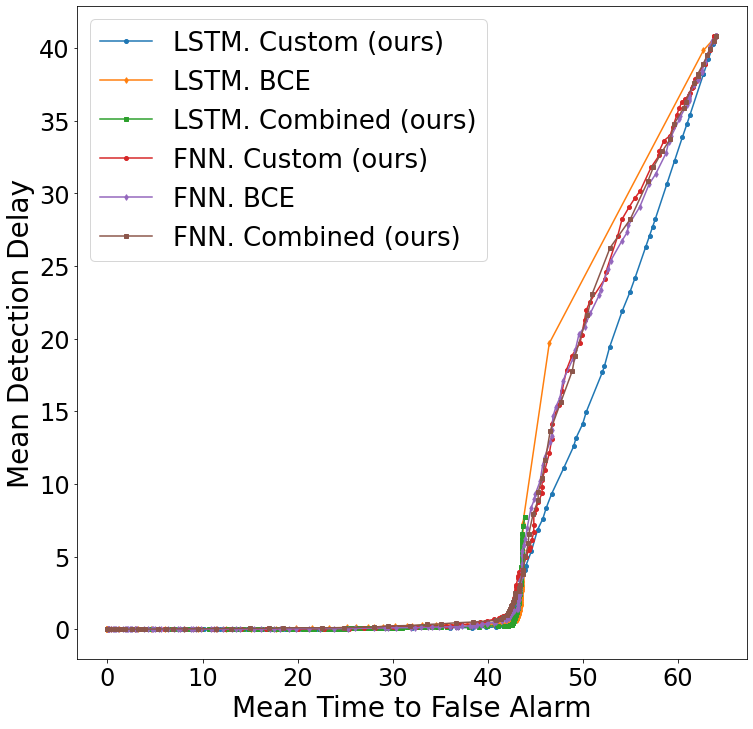

In [ ]:
plt.figure(figsize=(12, 12))
plt.plot(fp_delay_list_LSTM_custom, delay_list_LSTM_custom, '-o', markersize=4, label='LSTM. Custom (ours)')
plt.plot(fp_delay_list_LSTM_bce, delay_list_LSTM_bce, '-d', markersize=4, label='LSTM. BCE')
plt.plot(fp_delay_list_LSTM_combined, delay_list_LSTM_combined, '-s', markersize=4, label='LSTM. Combined (ours)')
plt.plot(fp_delay_list_FNN_custom, delay_list_FNN_custom, '-o', markersize=4, label='FNN. Custom (ours)')
plt.plot(fp_delay_list_FNN_bce, delay_list_FNN_bce, '-d', markersize=4, label='FNN. BCE ')
plt.plot(fp_delay_list_FNN_combined, delay_list_FNN_combined, '-s', markersize=4, label='FNN. Combined (ours)')



plt.xlabel('Mean Time to False Alarm', fontsize=28)
plt.ylabel('Mean Detection Delay', fontsize=28)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper left', fontsize=26);
plt.savefig('curve_fnn' + seq_name +  '.pdf', bbox_inches='tight')

In [ ]:
print('LSTM. CustomLoss model'," area under the graph: ", np.trapz(delay_list_LSTM_custom, fp_delay_list_LSTM_custom))
print('LSTM.BCELoss model'," area under the graph: ", np.trapz(delay_list_LSTM_bce, fp_delay_list_LSTM_bce))
print('LSTM. Combined model'," area under the graph: ", np.trapz(delay_list_LSTM_combined, fp_delay_list_LSTM_combined))
print('FNN. CustomLoss model'," area under the graph: ", np.trapz(delay_list_FNN_custom, fp_delay_list_FNN_custom))
print('FNN.BCELoss model'," area under the graph: ", np.trapz(delay_list_FNN_bce, fp_delay_list_FNN_bce))
print('FNN. Combined model'," area under the graph: ", np.trapz(delay_list_FNN_combined, fp_delay_list_FNN_combined))

LSTM. CustomLoss model  area under the graph:  445.3009168836806
LSTM.BCELoss model  area under the graph:  580.1233723958334
LSTM. Combined model  area under the graph:  6.701904296874998
FNN. CustomLoss model  area under the graph:  530.6184353298611
FNN.BCELoss model  area under the graph:  523.39599609375
FNN. Combined model  area under the graph:  531.0372178819445


In [ ]:
def find_nearest_threshold(array, value):
    #print(value)
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return threshold_list[idx]

def cross_the_border(x_meaning, y_meaning, border):
  for x, y in zip(x_meaning, y_meaning):
    if x > border:
      return y

def model_crossing(model_name, model, fp_delay, delay, LSTM_flag):
  x_coord = [32, 36, 40, 44, 48, 52]
  y_coord = []
  thresold_value = []

  model_results_list = []

  for i in range(len(x_coord)):

      test_batch_size = 64
      final_test_loader = prepare_loader(test_data, test_labels, seq_len, input_size, test_batch_size, shuffle=False)
      
      print(fp_delay)
      print(delay)
      print(x_coord[i])
      y_coord.append(cross_the_border(fp_delay, delay, x_coord[i]))
      thresold_value.append(find_nearest_threshold(delay, y_coord[i]))

      true_positive, true_negative, false_positive, false_negative, accuracy, precision, recall, f1_score, g_mean =  get_quality_metrics_for_results(model, final_test_loader, thresold_value[i], LSTM_flag)

      curr_model_res_points = [model_name, x_coord[i], y_coord[i], thresold_value[i]]
      curr_mode_res_threshold = [true_positive, true_negative, false_positive, false_negative, accuracy, precision, recall, f1_score, g_mean]
      curr_model_res = curr_model_res_points + curr_mode_res_threshold

      model_results_list.append(curr_model_res)

  #print(model_name, "(Mean FP delay, Mean delay): ", str([x_coord[0], y_coord[0]])," " ,str([x_coord[1], y_coord[1]]), " ", str([x_coord[2], y_coord[2]]))
  for i in range(len(x_coord)):
    print(model_name, "(Mean FP delay, Mean delay, Threshold): ", str([x_coord[i], y_coord[i]]), str(thresold_value[i]))
  print("---"*10)

  return model_results_list

In [ ]:
# model_crossing('LSTM. CustomLoss model', fp_delay_list_LSTM_custom, delay_list_LSTM_custom)
# model_crossing('LSTM.BCELoss model', fp_delay_list_LSTM_bce, delay_list_LSTM_bce)
# model_crossing('LSTM. Combined model', fp_delay_list_LSTM_combined, delay_list_LSTM_combined)
# model_crossing('FNN. CustomLoss model', fp_delay_list_FNN_custom, delay_list_FNN_custom)
# model_crossing('FNN.BCELoss model', fp_delay_list_FNN_bce, delay_list_FNN_bce)
# model_crossing('FNN. Combined model', fp_delay_list_FNN_combined, delay_list_FNN_combined)

**Сохранение результатов в ексель табличку**

In [ ]:
import pandas as pd

In [ ]:
columns_list = ["Model name", "Mean FP delay", "Mean delay", "Threshold", "TP", "TN", "FP", "FN", "Acc",
                "Precision", "Recall", "F1-score", "G-mean"]

In [ ]:
data_model_FNN_bce = model_crossing("model_FNN_bce", model_FNN_bce, fp_delay_list_FNN_bce, delay_list_FNN_bce, LSTM_flag=False)
df_main = pd.DataFrame(data_model_FNN_bce, columns = columns_list)

data_model_FNN_custom = model_crossing("model_FNN_custom", model_FNN_custom, fp_delay_list_FNN_custom, delay_list_FNN_custom, LSTM_flag=False)
df_main = df_main.append(pd.DataFrame(data_model_FNN_custom, columns = columns_list), ignore_index=True)

data_model_FNN_combined = model_crossing("model_FNN_combined", model_FNN_combined, fp_delay_list_FNN_combined, delay_list_FNN_combined, LSTM_flag=False)
df_main = df_main.append(pd.DataFrame(data_model_FNN_combined, columns = columns_list), ignore_index=True)

data_model_LSTM_bce = model_crossing("model_LSTM_bce", model_LSTM_bce, fp_delay_list_LSTM_bce, delay_list_LSTM_bce, LSTM_flag=True)
df_main = df_main.append(pd.DataFrame(data_model_LSTM_bce, columns = columns_list), ignore_index=True)

data_model_LSTM_custom = model_crossing("model_LSTM_custom", model_LSTM_custom, fp_delay_list_LSTM_custom, delay_list_LSTM_custom, LSTM_flag=True)
df_main = df_main.append(pd.DataFrame(data_model_LSTM_custom, columns = columns_list), ignore_index=True)

data_model_LSTM_combined = model_crossing("model_LSTM_combined", model_LSTM_combined,fp_delay_list_LSTM_combined, delay_list_LSTM_combined, LSTM_flag=True)
df_main = df_main.append(pd.DataFrame(data_model_LSTM_combined, columns = columns_list), ignore_index=True)


[0.036458333333333336, 0.036458333333333336, 0.041666666666666664, 0.052083333333333336, 0.0625, 0.07291666666666667, 0.09895833333333333, 0.140625, 0.18229166666666666, 0.21875, 0.3489583333333333, 0.5833333333333334, 0.71875, 0.84375, 0.9427083333333334, 1.1302083333333333, 1.6927083333333333, 1.8072916666666667, 1.9166666666666667, 2.03125, 2.1458333333333335, 2.3333333333333335, 2.453125, 2.5625, 2.8697916666666665, 3.03125, 3.15625, 3.8125, 4.229166666666667, 4.703125, 4.84375, 5.005208333333333, 5.458333333333333, 5.604166666666667, 6.354166666666667, 6.984375, 7.46875, 7.619791666666667, 8.09375, 8.828125, 9.052083333333334, 9.265625, 9.864583333333334, 10.901041666666666, 11.25, 11.572916666666666, 12.166666666666666, 13.0625, 13.484375, 13.890625, 15.395833333333334, 16.119791666666668, 17.09375, 17.510416666666668, 18.119791666666668, 19.067708333333332, 19.848958333333332, 21.166666666666668, 22.375, 23.864583333333332, 25.291666666666668, 26.057291666666668, 27.989583333333

TypeError: ignored

In [ ]:
df_main.to_excel("num" + seq_name + "_old.xlsx", index = False)

## KOSTUL FOR NEW METRICS

In [ ]:
# Правильный подсчет значений delay в выбранном fp_delay

def find_nearest_left_and_right_coord_index(array, value):
    array = np.asarray(array)
    left_idx = (np.abs(array - value)).argmin()
    if array[left_idx] > value:
        left_idx = left_idx - 1
    right_idx = left_idx + 1

    if right_idx > len(array):
        left_idx = left_idx - 1
        right_idx = right_idx - 1

    if left_idx < 0:
        left_idx = left_idx + 1
        right_idx = right_idx + 1
    return left_idx, right_idx

def lin_func(x1, y1, x2, y2, x):
    y = ((x - x1)*(y2 - y1)/(x2 - x1)) + y1
    return y

def find_threshold(fp_delay, x_coord, threshold_list):
    left_idx, right_idx = find_nearest_left_and_right_coord_index(fp_delay, x_coord)
    threshold = lin_func(fp_delay[left_idx], threshold_list[left_idx], fp_delay[right_idx], threshold_list[right_idx], x_coord)

    print(fp_delay[left_idx], threshold_list[left_idx], fp_delay[right_idx], threshold_list[right_idx], x_coord)

    return threshold


In [ ]:
def metrics_by_fp_delay_x_coord(model_name, model, test_loader, fp_delay, threshold_list, x_coord_arr, LSTM_flag):
    y_coord_arr = []
    thresold_value = []

    model_results_list = []

    for x_coord in range(len(x_coord_arr)):
        threshold = find_threshold(fp_delay, x_coord_arr[x_coord], threshold_list)

        true_positive, true_negative, false_positive, false_negative, _, _, _, _, _ =  get_quality_metrics_for_results(model, test_loader, threshold, LSTM_flag)

        print(delay, threshold, false_positive_delay)

        y_coord_arr.append(delay)
        thresold_value.append(threshold)

        accuracy = weird_division((true_positive + true_negative),
                                  (true_positive + true_negative + false_positive + false_negative))
        precision = weird_division(true_positive, (true_positive + false_positive))
        recall = weird_division(true_positive, (true_positive + false_negative))
        f1_score = weird_division((2 * precision * recall), (precision + recall))
        spec = weird_division(true_negative, (false_positive + true_negative))
        g_mean = np.sqrt(recall + spec)
        curr_model_res_points = [model_name, x_coord_arr[x_coord], delay, threshold]
        curr_model_res_threshold = [true_positive, true_negative, false_positive, false_negative, accuracy, precision,
                                   recall, f1_score, g_mean]
        curr_model_res = curr_model_res_points + curr_model_res_threshold

        model_results_list.append(curr_model_res)

    return model_results_list



In [ ]:
# Функция принимает: название модели, модель, тест_лоадер, батч_сайз, массив fp_delay, массив интересущих нас значений
# fp_delay, путь куда сохранить таблицу . Значения fp_delay берутся при подсчете get_pareto_metrics_for_threshold.
# x_coord задаем сами. Данная версия отличается от предыдущей более правильным подсчетом trashold.
# Пример использования:
# fp_delay = [4, 8, 9, 12]
# x_coord_arr = [5, 10]
# save_metrics_to_file_new_version("ModelBCE",
#                                  model_bce, test_loader, BATCH_SIZE, fp_delay, x_coord_arr, path_to_save = "/home")
def save_metrics_to_file_new_version(model_name, model, test_loader, fp_delay, threshold_list, x_coord_arr, LSTM_flag, path_to_save = ""):
  columns_list = ["Model name", "Mean FP delay", "Mean delay", "Threshold", "TP", "TN", "FP", "FN", "Acc",
                "Precision", "Recall", "F1-score", "G-mean"]
  data_model_results = metrics_by_fp_delay_x_coord(model_name, model, test_loader, fp_delay, threshold_list, x_coord_arr, LSTM_flag)
  df_main = pd.DataFrame(data_model_results, columns = columns_list)
  df_main.to_excel(os.path.join(path_to_save, model_name + ".xlsx" ), index = False)

In [ ]:
# x_coord_arr = [32, 36, 40, 44, 48, 52]
# save_metrics_to_file_new_version("model_LSTM_bce", model_LSTM_bce, test_loader, fp_delay_list_LSTM_bce, threshold_list, x_coord_arr, LSTM_flag=True)
# save_metrics_to_file_new_version("model_LSTM_custom", model_LSTM_custom, test_loader, fp_delay_list_LSTM_custom, threshold_list, x_coord_arr, LSTM_flag=True)
# save_metrics_to_file_new_version("model_LSTM_combined", model_LSTM_combined,test_loader, fp_delay_list_LSTM_combined, threshold_list, x_coord_arr, LSTM_flag=True)